In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
df=pd.read_csv('/content/sample_data/unimelb_training.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (90,105,119,120,123,124,132,134,135,138,139,147,149,150,153,154,162,164,165,168,169,177,179,183,184,192,194,198,199,207,209,213,214,224,237,239,244) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# from google.colab import drive
# drive.mount('/content/sample_data/unimelb_training.csv')

In [ ]:
# df.head(10)

In [ ]:
# df['Role.1'].value_counts()

In [ ]:
Approval=df[df['Grant.Status']!=0]
# Approval.head()

In [ ]:
# df[['Role.1', 'Grant.Status']].groupby(['Role.1'], as_index=False).mean().sort_values(by='Grant.Status', ascending=False)

In [ ]:
# plt.figure(figsize=(6,6))
# plt.pie(list(Approval['Role.1'].value_counts()),labels=list(Approval['Role.1'].value_counts().keys()),autopct='%0.1f%%')
# plt.show()

In [ ]:
# df['Country.of.Birth.1'].value_counts()

In [ ]:
# plt.figure(figsize=(6,6))
# plt.pie(list(Approval['Country.of.Birth.1'].value_counts()),labels=list(Approval['Country.of.Birth.1'].value_counts().keys()),autopct='%0.1f%%')
# plt.show()

In [ ]:
# df[['Country.of.Birth.1', 'Grant.Status']].groupby(['Country.of.Birth.1'], as_index=False).mean().sort_values(by='Grant.Status', ascending=False)

In [ ]:
# df['Year.of.Birth.1'].value_counts()

In [ ]:
# df[['Year.of.Birth.1', 'Grant.Status']].groupby(['Year.of.Birth.1'], as_index=False).mean().sort_values(by='Grant.Status', ascending=False)

In [ ]:
# df.info()

In [ ]:
# df.columns

In [ ]:
# df['Grant.Status'].value_counts()

In [ ]:
# df.isnull().sum()

In [ ]:
# df.shape

In [ ]:
#features to exclude from analysis
features = ['Grant.Application.ID', 'Year.of.Birth.1', 'Start.date','Unnamed: 251', 'Country.of.Birth.1', 'Dept.No..1', 'Dept.No..1', 'A..1', 'A.1', 'B.1', 'C.1']
for col in range(1, 16):
    if 'No..of.Years.in.Uni.at.Time.of.Grant.'+ str(col) in list(df.columns):
        features.append('No..of.Years.in.Uni.at.Time.of.Grant.'+str(col))

#removing Nan data if greater than 3000
for col in list(df.columns):
    if df[col].isnull().sum() > 3000:
        features.append(col)

In [ ]:
df = df.drop(features, axis=1)

In [ ]:
df.shape

(8708, 28)

In [ ]:
# df

In [ ]:
# df.describe()

In [ ]:
# df.columns

In [ ]:
features = ['RFCD.Code.4', 'RFCD.Percentage.4','RFCD.Code.5', 'RFCD.Percentage.5','SEO.Code.4','SEO.Percentage.4','SEO.Code.5','SEO.Percentage.4']
df = df.drop(features, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Grant.Status                    8708 non-null   int64  
 1   Sponsor.Code                    7796 non-null   object 
 2   Grant.Category.Code             7796 non-null   object 
 3   RFCD.Code.1                     8074 non-null   float64
 4   RFCD.Percentage.1               8074 non-null   float64
 5   RFCD.Code.2                     8074 non-null   float64
 6   RFCD.Percentage.2               8074 non-null   float64
 7   RFCD.Code.3                     8074 non-null   float64
 8   RFCD.Percentage.3               8074 non-null   float64
 9   SEO.Code.1                      8044 non-null   float64
 10  SEO.Percentage.1                8044 non-null   float64
 11  SEO.Code.2                      8044 non-null   float64
 12  SEO.Percentage.2                80

In [ ]:
df.columns

Index(['Grant.Status', 'Sponsor.Code', 'Grant.Category.Code', 'RFCD.Code.1',
       'RFCD.Percentage.1', 'RFCD.Code.2', 'RFCD.Percentage.2', 'RFCD.Code.3',
       'RFCD.Percentage.3', 'SEO.Code.1', 'SEO.Percentage.1', 'SEO.Code.2',
       'SEO.Percentage.2', 'SEO.Code.3', 'SEO.Percentage.3',
       'SEO.Percentage.5', 'Person.ID.1', 'Role.1', 'Faculty.No..1',
       'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1'],
      dtype='object')

In [ ]:
df

,Grant.Status,Sponsor.Code,Grant.Category.Code,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,SEO.Code.1,...,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Percentage.5,Person.ID.1,Role.1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,1,NaN,NaN,280199.0,100.0,0.0,0.0,0.0,0.0,700299.0,...,0.0,0.0,0.0,0.0,0.0,40572.0,CHIEF_INVESTIGATOR,31.0,0.0,0.0
1,1,2B,10A,280103.0,30.0,280106.0,30.0,280203.0,40.0,700103.0,...,700102.0,50.0,0.0,0.0,0.0,9067.0,CHIEF_INVESTIGATOR,25.0,0.0,0.0
2,1,29A,10B,321004.0,60.0,321216.0,40.0,0.0,0.0,730105.0,...,730207.0,40.0,0.0,0.0,0.0,5967.0,CHIEF_INVESTIGATOR,25.0,0.0,0.0
3,1,40D,10B,270602.0,50.0,320602.0,50.0,0.0,0.0,730106.0,...,730201.0,30.0,0.0,0.0,0.0,78782.0,PRINCIPAL_SUPERVISOR,25.0,0.0,0.0
4,0,59C,10A,260500.0,34.0,280000.0,33.0,290000.0,33.0,770199.0,...,0.0,0.0,0.0,0.0,0.0,13042.0,CHIEF_INVESTIGATOR,19.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1,21A,50A,321028.0,100.0,0.0,0.0,0.0,0.0,730114.0,...,0.0,0.0,0.0,0.0,0.0,20937.0,CHIEF_INVESTIGATOR,25.0,1.0,11.0
8704,1,21A,50A,340299.0,50.0,390114.0,50.0,0.0,0.0,720299.0,...,0.0,0.0,0.0,0.0,0.0,64237.0,CHIEF_INVESTIGATOR,13.0,2.0,0.0
8705,0,137A,30B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68437.0,CHIEF_INVESTIGATOR,19.0,1.0,3.0
8706,1,21A,50A,280210.0,40.0,239901.0,40.0,280206.0,20.0,671303.0,...,700302.0,30.0,780105.0,30.0,0.0,82722.0,CHIEF_INVESTIGATOR,19.0,2.0,1.0


In [ ]:
#filling null values
for col in list(df.columns):
    if df[col].dtypes == 'object':
        df[col] = df[col].fillna(df[col].value_counts().idxmax())
    # elif df[col].dtypes == 'float64':
    #     df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mean())

In [ ]:
df.isnull().sum()

Grant.Status                      0
Sponsor.Code                      0
Grant.Category.Code               0
RFCD.Code.1                       0
RFCD.Percentage.1                 0
RFCD.Code.2                       0
RFCD.Percentage.2                 0
RFCD.Code.3                       0
RFCD.Percentage.3                 0
SEO.Code.1                        0
SEO.Percentage.1                  0
SEO.Code.2                        0
SEO.Percentage.2                  0
SEO.Code.3                        0
SEO.Percentage.3                  0
SEO.Percentage.5                  0
Person.ID.1                       0
Role.1                            0
Faculty.No..1                     0
Number.of.Successful.Grant.1      0
Number.of.Unsuccessful.Grant.1    0
dtype: int64

In [ ]:
df.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,SEO.Code.1,...,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Percentage.5,Person.ID.1,Role.1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,1,4D,10A,280199.0,100.0,0.0,0.0,0.0,0.0,700299.0,...,0.0,0.0,0.0,0.0,0.0,40572.0,CHIEF_INVESTIGATOR,31.0,0.0,0.0
1,1,2B,10A,280103.0,30.0,280106.0,30.0,280203.0,40.0,700103.0,...,700102.0,50.0,0.0,0.0,0.0,9067.0,CHIEF_INVESTIGATOR,25.0,0.0,0.0
2,1,29A,10B,321004.0,60.0,321216.0,40.0,0.0,0.0,730105.0,...,730207.0,40.0,0.0,0.0,0.0,5967.0,CHIEF_INVESTIGATOR,25.0,0.0,0.0
3,1,40D,10B,270602.0,50.0,320602.0,50.0,0.0,0.0,730106.0,...,730201.0,30.0,0.0,0.0,0.0,78782.0,PRINCIPAL_SUPERVISOR,25.0,0.0,0.0
4,0,59C,10A,260500.0,34.0,280000.0,33.0,290000.0,33.0,770199.0,...,0.0,0.0,0.0,0.0,0.0,13042.0,CHIEF_INVESTIGATOR,19.0,0.0,0.0


In [ ]:
df.dtypes

Grant.Status                        int64
Sponsor.Code                       object
Grant.Category.Code                object
RFCD.Code.1                       float64
RFCD.Percentage.1                 float64
RFCD.Code.2                       float64
RFCD.Percentage.2                 float64
RFCD.Code.3                       float64
RFCD.Percentage.3                 float64
SEO.Code.1                        float64
SEO.Percentage.1                  float64
SEO.Code.2                        float64
SEO.Percentage.2                  float64
SEO.Code.3                        float64
SEO.Percentage.3                  float64
SEO.Percentage.5                  float64
Person.ID.1                       float64
Role.1                             object
Faculty.No..1                     float64
Number.of.Successful.Grant.1      float64
Number.of.Unsuccessful.Grant.1    float64
dtype: object

In [ ]:
## Transform to Encoder

from sklearn.preprocessing import LabelEncoder

## Transform to Encoder in train set

for col in list(df.columns):
    if df[col].dtypes == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,SEO.Code.1,...,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Percentage.5,Person.ID.1,Role.1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,1,255,0,280199.0,100.0,0.0,0.0,0.0,0.0,700299.0,...,0.0,0.0,0.0,0.0,0.0,40572.0,0,31.0,0.0,0.0
1,1,187,0,280103.0,30.0,280106.0,30.0,280203.0,40.0,700103.0,...,700102.0,50.0,0.0,0.0,0.0,9067.0,0,25.0,0.0,0.0
2,1,186,1,321004.0,60.0,321216.0,40.0,0.0,0.0,730105.0,...,730207.0,40.0,0.0,0.0,0.0,5967.0,0,25.0,0.0,0.0
3,1,236,1,270602.0,50.0,320602.0,50.0,0.0,0.0,730106.0,...,730201.0,30.0,0.0,0.0,0.0,78782.0,5,25.0,0.0,0.0
4,0,263,0,260500.0,34.0,280000.0,33.0,290000.0,33.0,770199.0,...,0.0,0.0,0.0,0.0,0.0,13042.0,0,19.0,0.0,0.0


In [ ]:
df.dtypes

Grant.Status                        int64
Sponsor.Code                        int64
Grant.Category.Code                 int64
RFCD.Code.1                       float64
RFCD.Percentage.1                 float64
RFCD.Code.2                       float64
RFCD.Percentage.2                 float64
RFCD.Code.3                       float64
RFCD.Percentage.3                 float64
SEO.Code.1                        float64
SEO.Percentage.1                  float64
SEO.Code.2                        float64
SEO.Percentage.2                  float64
SEO.Code.3                        float64
SEO.Percentage.3                  float64
SEO.Percentage.5                  float64
Person.ID.1                       float64
Role.1                              int64
Faculty.No..1                     float64
Number.of.Successful.Grant.1      float64
Number.of.Unsuccessful.Grant.1    float64
dtype: object

In [ ]:
df.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,SEO.Code.1,...,SEO.Code.2,SEO.Percentage.2,SEO.Code.3,SEO.Percentage.3,SEO.Percentage.5,Person.ID.1,Role.1,Faculty.No..1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,1,255,0,280199.0,100.0,0.0,0.0,0.0,0.0,700299.0,...,0.0,0.0,0.0,0.0,0.0,40572.0,0,31.0,0.0,0.0
1,1,187,0,280103.0,30.0,280106.0,30.0,280203.0,40.0,700103.0,...,700102.0,50.0,0.0,0.0,0.0,9067.0,0,25.0,0.0,0.0
2,1,186,1,321004.0,60.0,321216.0,40.0,0.0,0.0,730105.0,...,730207.0,40.0,0.0,0.0,0.0,5967.0,0,25.0,0.0,0.0
3,1,236,1,270602.0,50.0,320602.0,50.0,0.0,0.0,730106.0,...,730201.0,30.0,0.0,0.0,0.0,78782.0,5,25.0,0.0,0.0
4,0,263,0,260500.0,34.0,280000.0,33.0,290000.0,33.0,770199.0,...,0.0,0.0,0.0,0.0,0.0,13042.0,0,19.0,0.0,0.0


In [ ]:
df['Sponsor.Code'].describe()

count    8708.000000
mean      201.401700
std        69.047989
min         0.000000
25%       186.000000
50%       222.000000
75%       255.000000
max       296.000000
Name: Sponsor.Code, dtype: float64

In [ ]:
df['Grant.Status'].value_counts()

0    4716
1    3992
Name: Grant.Status, dtype: int64

In [ ]:
df['Grant.Category.Code'].describe()

count    8708.000000
mean        2.741387
std         3.951463
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max        12.000000
Name: Grant.Category.Code, dtype: float64

In [ ]:
df['Role.1'].describe()

count    8708.000000
mean        0.357373
std         1.153333
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: Role.1, dtype: float64

(3992, 21) (4716, 21)


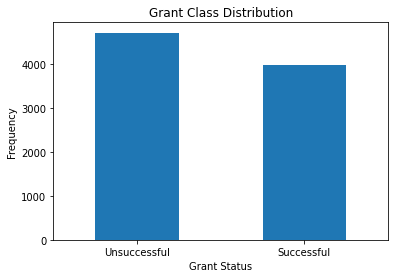

In [ ]:
count_classes = pd.value_counts(df['Grant.Status'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Grant Class Distribution")

LABELS=['Unsuccessful','Successful']

plt.xticks(range(2), LABELS)

plt.xlabel("Grant Status")

plt.ylabel("Frequency")

Successful = df[df['Grant.Status']==1]

Unsuccessful = df[df['Grant.Status']==0]

print(Successful.shape,Unsuccessful.shape)

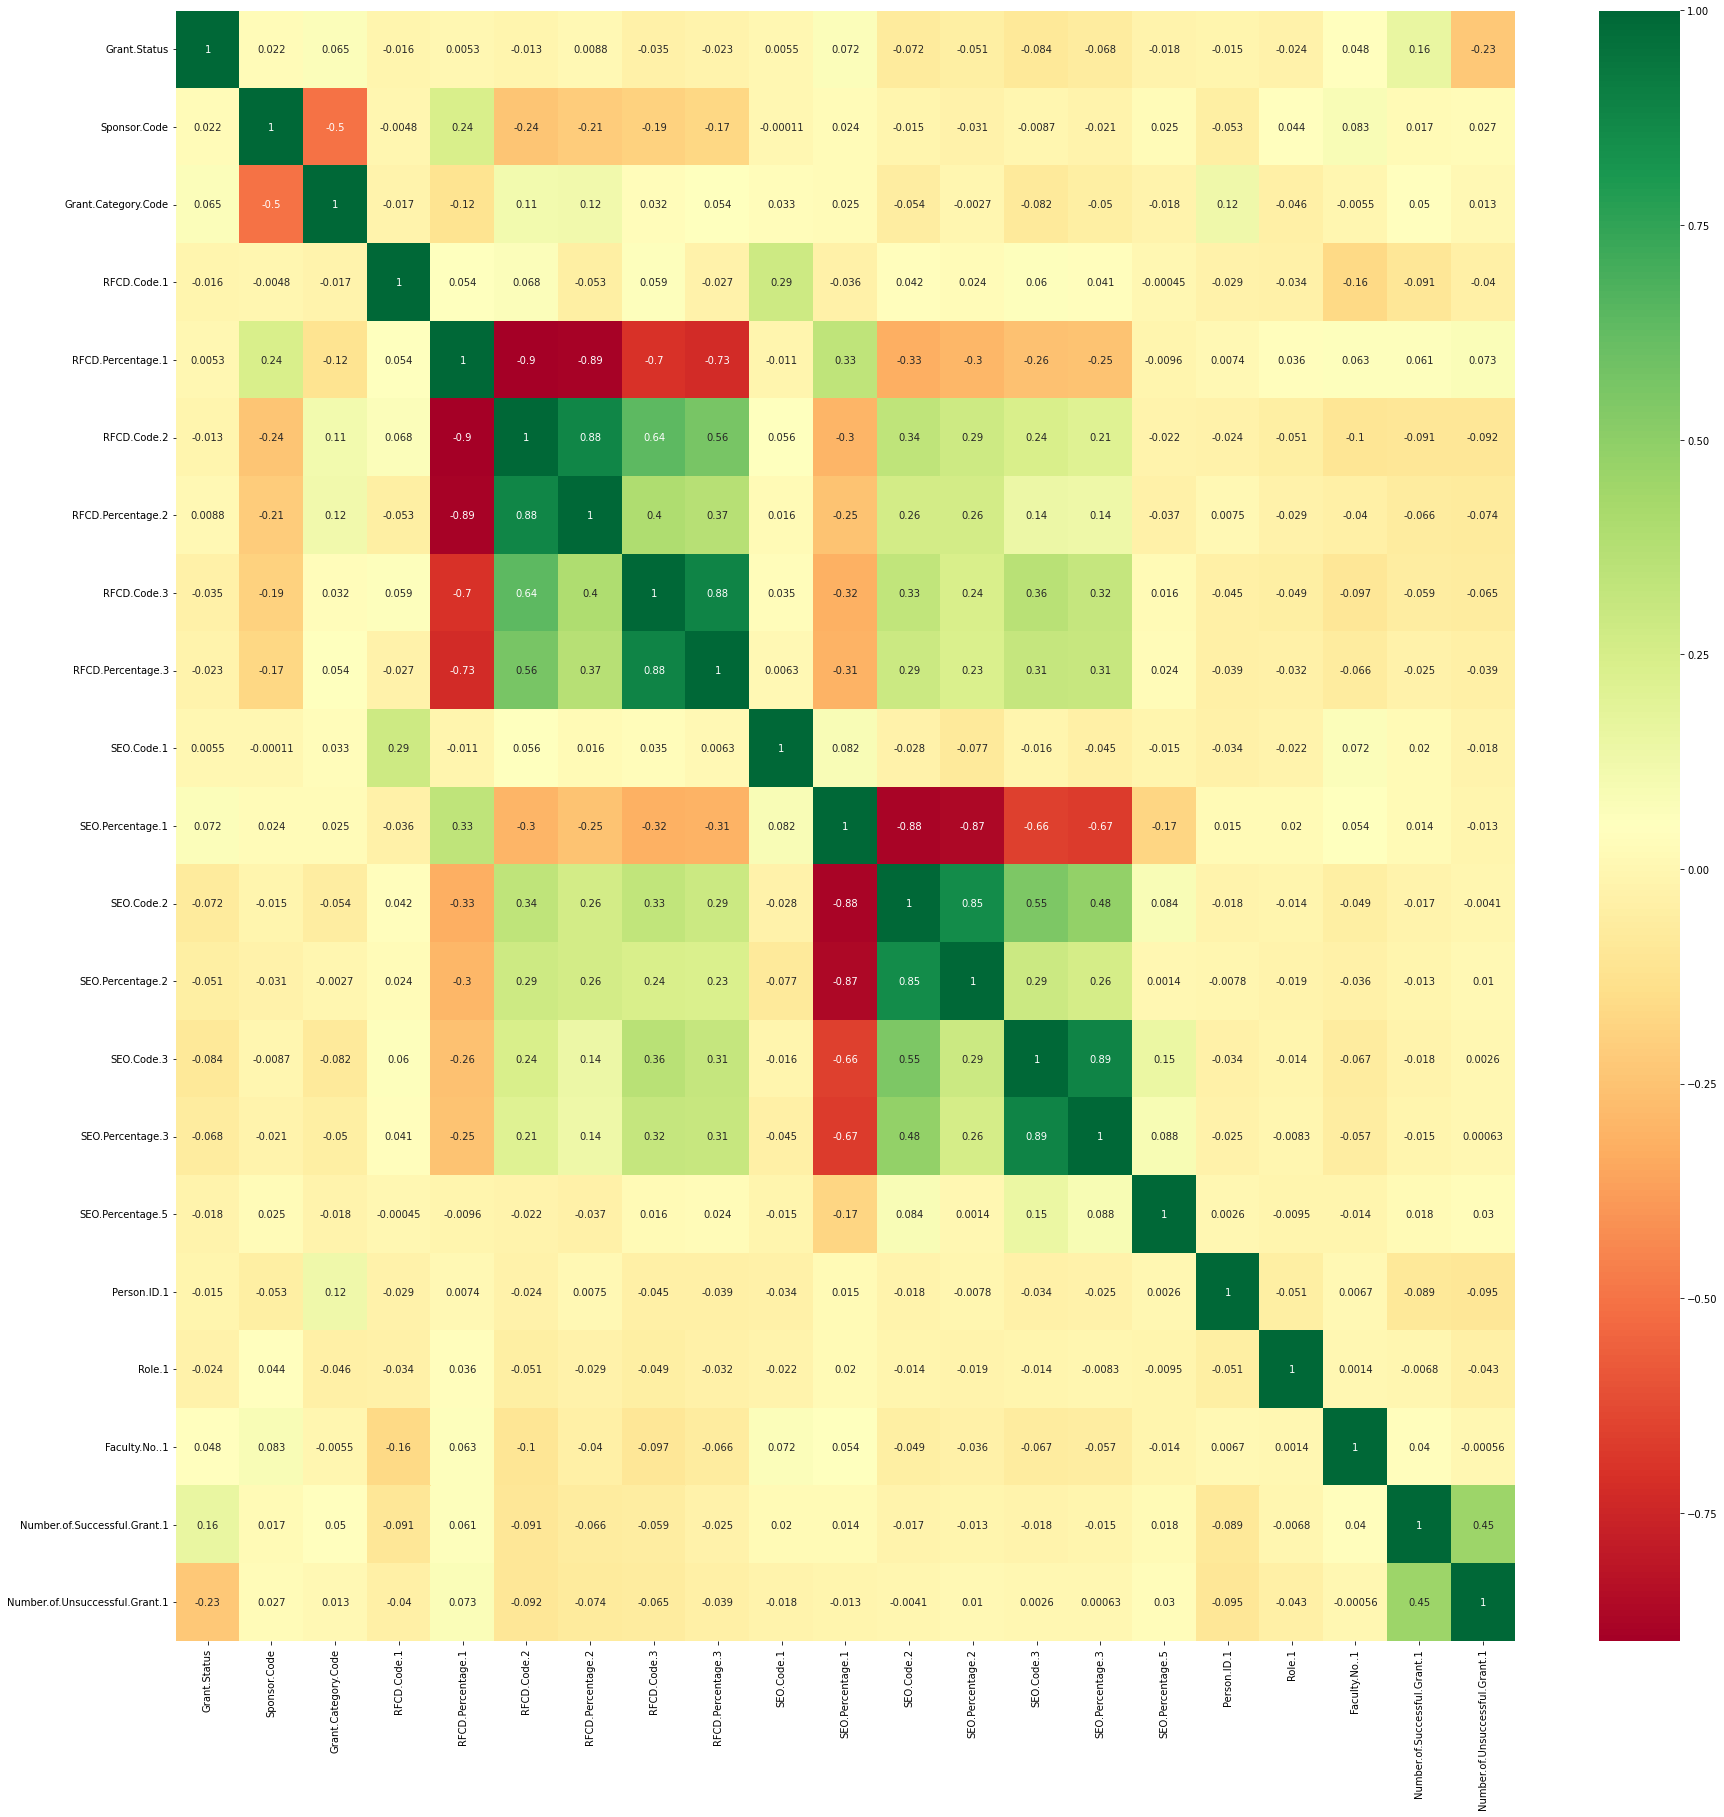

In [ ]:
## Correlation
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

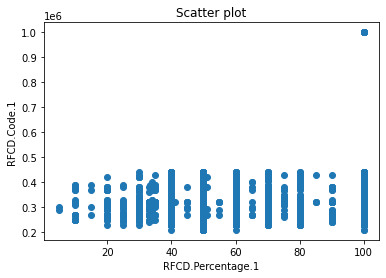

In [ ]:
plt.scatter(df['RFCD.Percentage.1'],df['RFCD.Code.1'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Scatter plot')
plt.xlabel('RFCD.Percentage.1')
plt.ylabel('RFCD.Code.1')
plt.show()

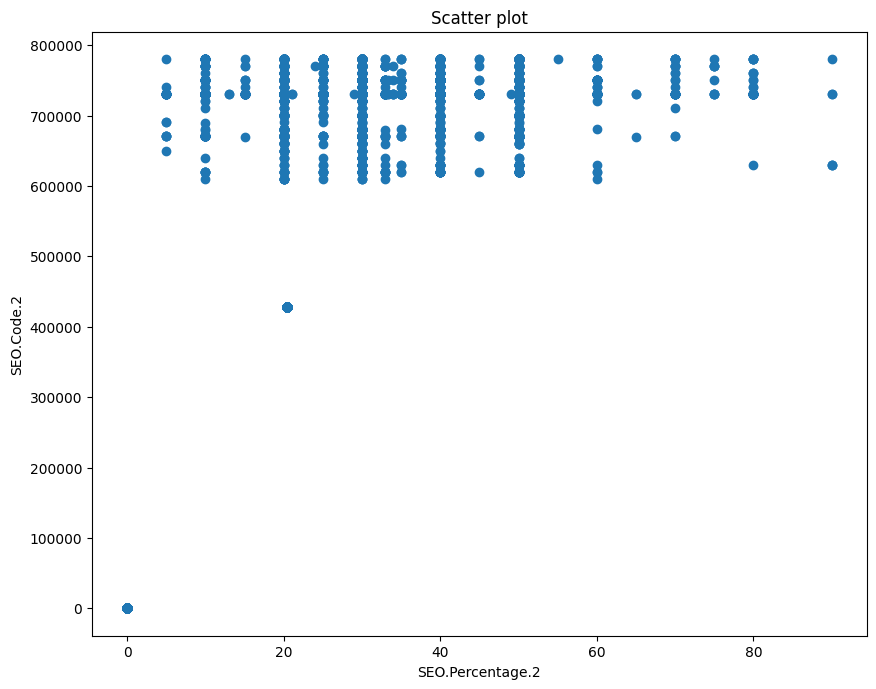

In [ ]:
plt.scatter(df['SEO.Percentage.2'],df['SEO.Code.2'])
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Scatter plot')
plt.xlabel('SEO.Percentage.2')
plt.ylabel('SEO.Code.2')
plt.show()

In [ ]:
y = df['Grant.Status']
X = df.drop(['Grant.Status'], axis=1)

In [ ]:
## Split data to train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6966, 20), (1742, 20), (6966,), (1742,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)

0.5878300803673938

In [ ]:
y_pred  =  classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)

In [ ]:
ac

0.5878300803673938

In [ ]:
print(cm)
print('accuracy =',ac)
print(cr)

[[529 452]
 [266 495]]
accuracy = 0.5878300803673938
              precision    recall  f1-score   support

           0       0.67      0.54      0.60       981
           1       0.52      0.65      0.58       761

    accuracy                           0.59      1742
   macro avg       0.59      0.59      0.59      1742
weighted avg       0.60      0.59      0.59      1742



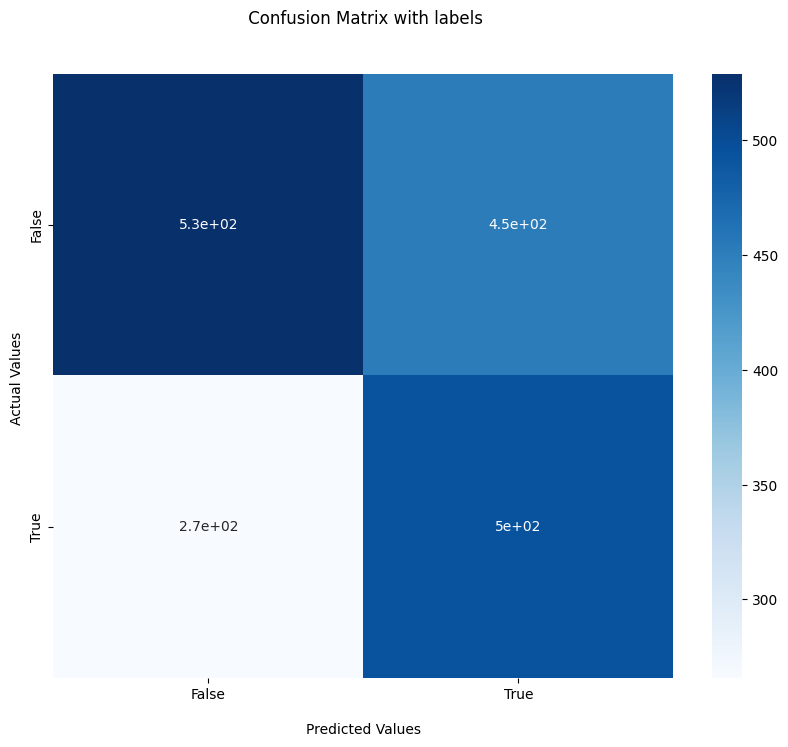

In [ ]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7210103329506314

In [ ]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

model = RandomForestClassifier(n_estimators=5000, max_depth=5, random_state=0)
model.fit(X_train, y_train)
random_forest_Pred = model.predict(X_test)

print(rmsle(y_test, random_forest_Pred))

0.49160577113531495


In [ ]:
grad_boost = GradientBoostingClassifier(n_estimators=1000)
grad_boost.fit(X_train, y_train)
Y_pred = grad_boost.predict(X_test)

print(rmsle(y_test, Y_pred))

0.4707275069118972


In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
Y_pred_3 = svc.predict(X_test)

print(rmsle(y_test, Y_pred_3))

0.5105095268825915


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
Y_pred_2 = neigh.predict(X_test)

print(rmsle(y_test, Y_pred_2))

0.5795005569646918


In [ ]:
from sklearn.model_selection import KFold
model=GaussianNB()
kfold_validation=KFold(10)

In [ ]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.50861079 0.47072331 0.50861079 0.57405281 0.55912744 0.53386912
 0.59357061 0.5510907  0.54827586 0.54022989]
0.5388161315438722
